In [1]:
import numpy as np
from models import *
from regression import *
from util import show
from optimize.util import *

In [2]:
# init_point = np.array([0.65, 0.65])
# powell_dog_leg(f, g, H, init_point, 0.5, 0.05, 30)

In [3]:
start = np.array([10, 0.5])

begin = 0
end = 10
steps = 100
x, y = example.generate_test(example.plus(np.sin, np.cos), begin, end, steps)

In [4]:
func, jac = funcs["exp"]
func1, jac1 = funcs["sin2"]

test = optimize(func, jac, regression, grad, hessian, method='POWELL-DOG-LEG')
test1 = optimize(func1, jac1, regression, grad, hessian, method='POWELL-DOG-LEG')
betta = test(x, y, start, 0.5, 0.05, 100)
# betta = square_regression(f, x, y, g, H, start, 0.5, 0.05, 30)

X = np.linspace(begin, end, steps)
Y = func(X)(betta)
print(start, betta)

[10.   0.5] [ 1.87958143 -0.97272758]


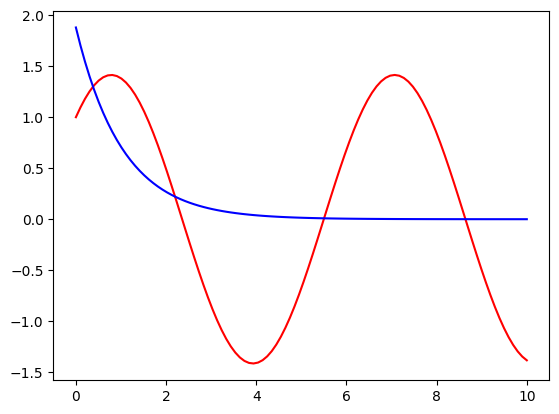

In [5]:
show(x, y, X, Y)

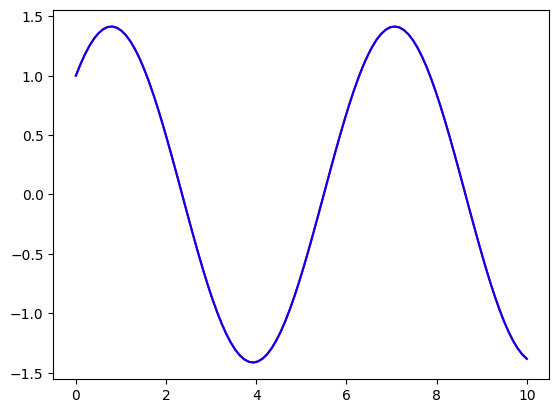

In [6]:
betta1 = test1(x, y, np.array([1., 1., 1.]), 0.5, 0.005, 100)
X1 = np.linspace(begin, end, steps)
Y1 = func1(X1)(betta1)
show(x, y, X1, Y1)

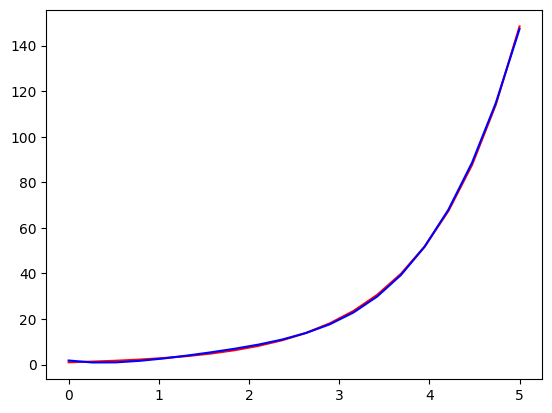

In [7]:
import tests as tests

input = tests.create_tests()

interest = 30
iter = 0
for test in input:
    if iter != interest:
        iter += 1
        continue
    
    func, jac = test.model
    task = optimize(func, jac, regression, grad, hessian, method='POWELL-DOG-LEG')
    
    betta = task(test.X, test.Y, test.init_point, 0.5, 1e-4, 10000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    example.show(test.X, test.Y, X, Y)
    
    iter += 1